#DATA
WHO announced that cardiovascular diseases is the top one killer over the world. There are seventeen million people died from it every year, especially heart disease. Prevention is better than cure. If we can evaluate the risk of every patient who probably has heart disease, that is, not only patients but also everyone can do something earlier to keep illness away.

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

#CONTENT
There are thirteen features and one target as below:

- age: The person's age in years 

- sex: The person's sex (1 = male, 0 = female)

- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

- chol: The person's cholesterol measurement in mg/dl

- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

- thalach: The person's maximum heart rate achieved

- exang: Exercise induced angina (1 = yes; 0 = no)

- oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

- ca: The number of major vessels (0-3)

- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

- target: Heart disease (0 = no, 1 = yes)

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [7]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Missing Value Found in data

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


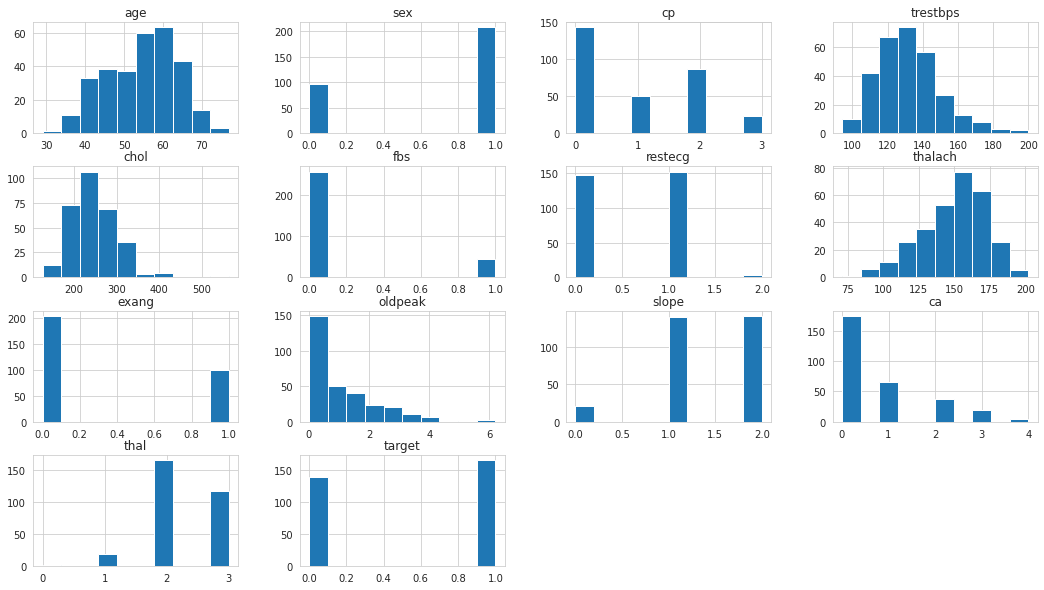

In [10]:
#performing EDA
import matplotlib.pyplot as plt
heart_data.hist(figsize=(18,10))
plt.show()

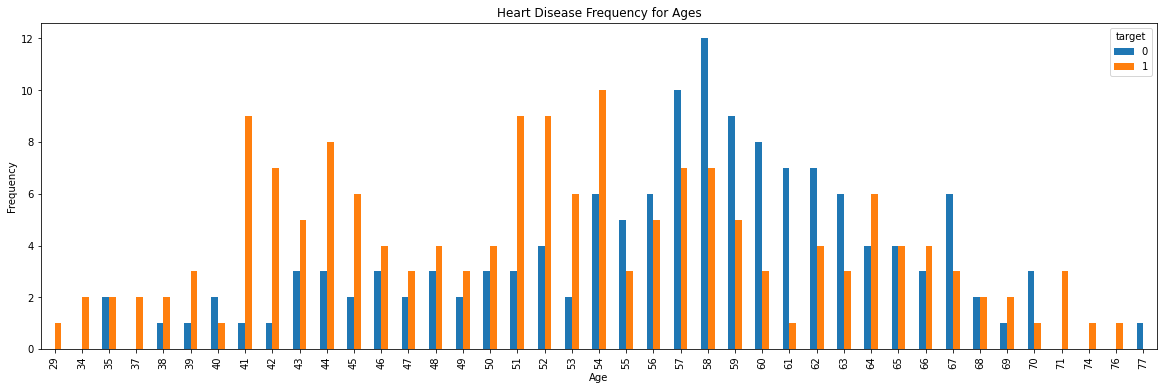

In [ ]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

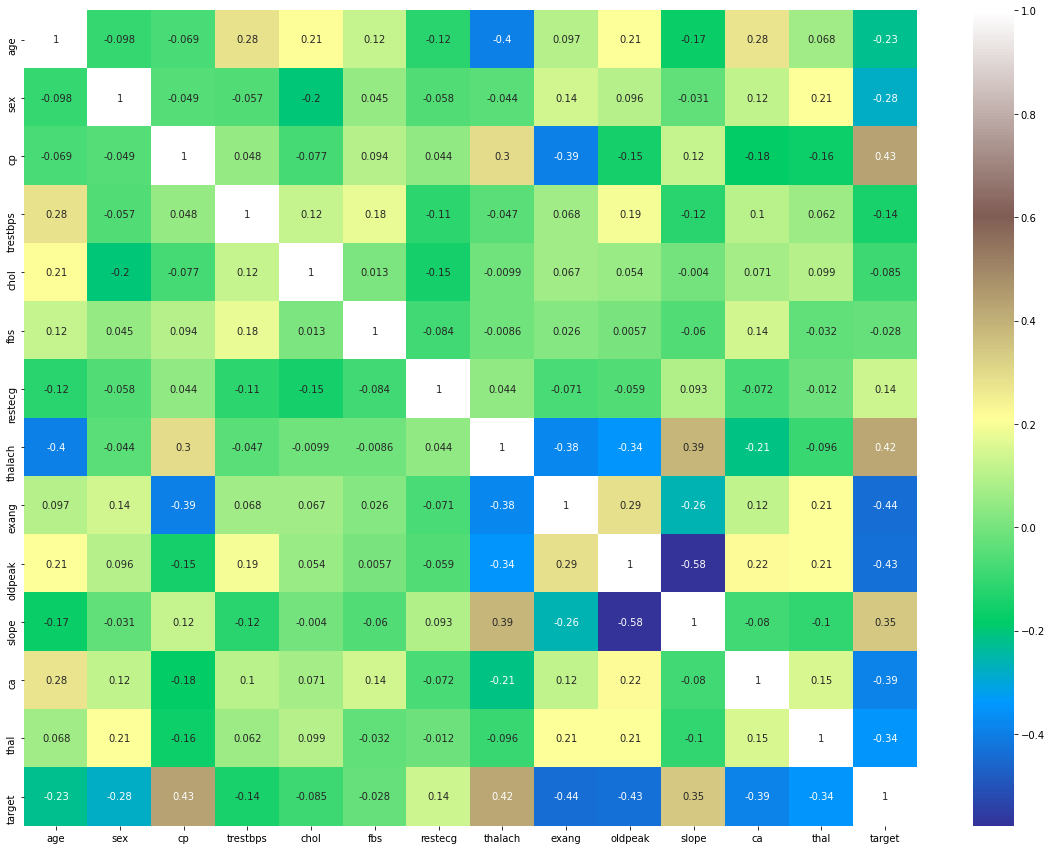

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(heart_data.corr(), annot= True, cmap= 'terrain')  # or cmap = "RdYlGn"
plt.show()

### We observe positive correlation between target and cp, thalach, slope and also negative correlation between target and sex, exang, ca, thai, oldpeak

In [ ]:
# Positive correlation means more chances to get a heart disease and vice-versa.

In [ ]:
# SEX
# 0 ---> Female
# 1 ---> Male

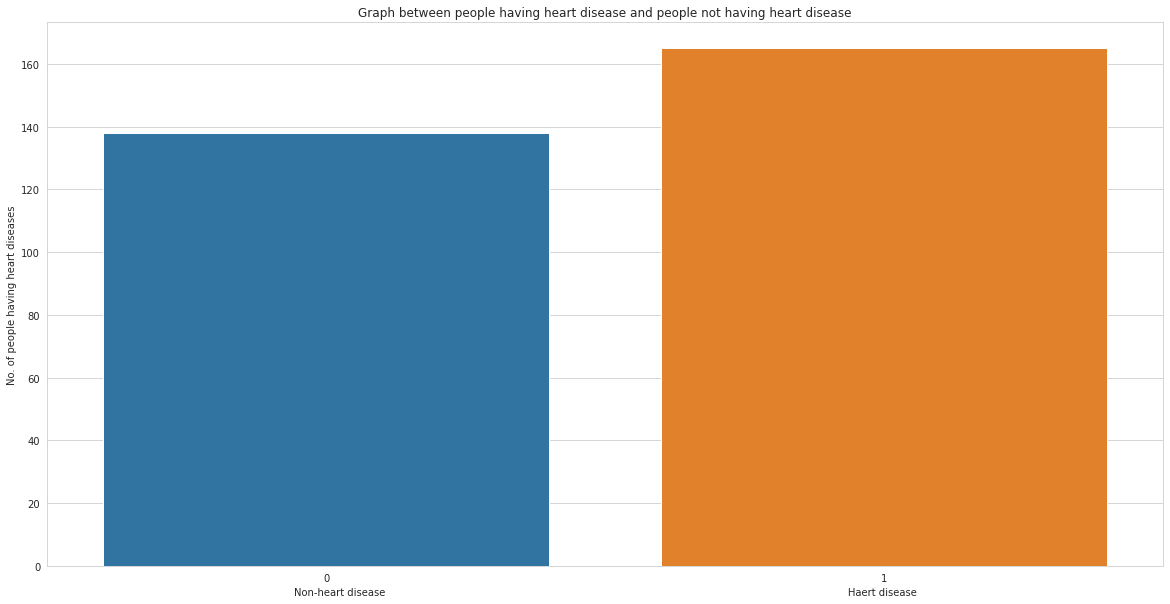

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='target', data= heart_data, palette= 'tab10')
plt.title('Graph between people having heart disease and people not having heart disease')
plt.ylabel('No. of people having heart diseases')
plt.xlabel('Non-heart disease                                                                                                                                                    Haert disease')
plt.show()

<Figure size 3600x3600 with 0 Axes>

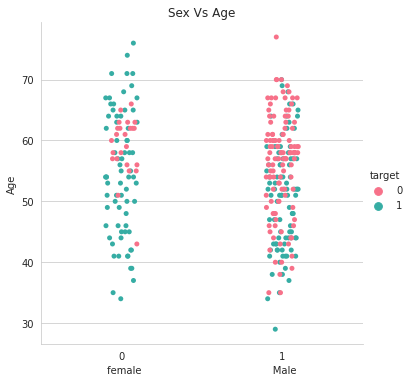

In [ ]:
plt.figure(figsize=(50, 50))
sns.catplot(x= 'sex', y='age', data= heart_data,hue= 'target', palette= 'husl')
plt.title('Sex Vs Age')
plt.xlabel('female                                          Male')
plt.ylabel('Age')
plt.show()

### There are more no. of female who suffer from heart disease than men.

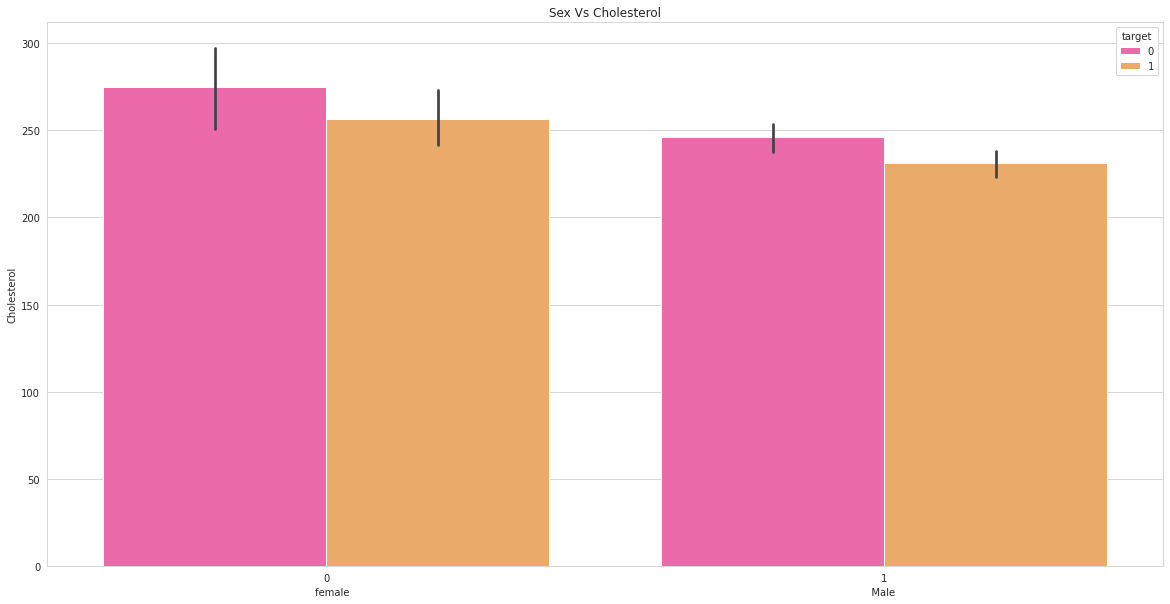

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x= 'sex', y= 'chol', data= heart_data, hue= 'target', palette='spring')
plt.title('Sex Vs Cholesterol')
plt.xlabel('female                                                                                                                                                                       Male')
plt.ylabel('Cholesterol')
plt.show()

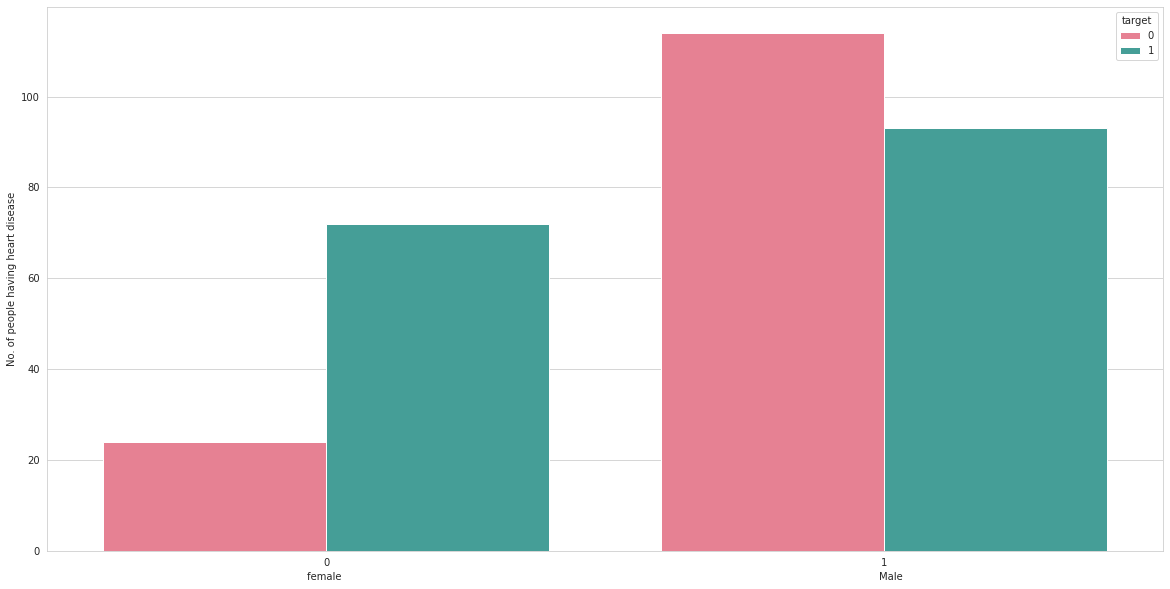

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'sex', data= heart_data,hue= 'target', palette= 'husl')
plt.xlabel('female                                                                                                                                                                            Male')
plt.ylabel('No. of people having heart disease')
plt.show()

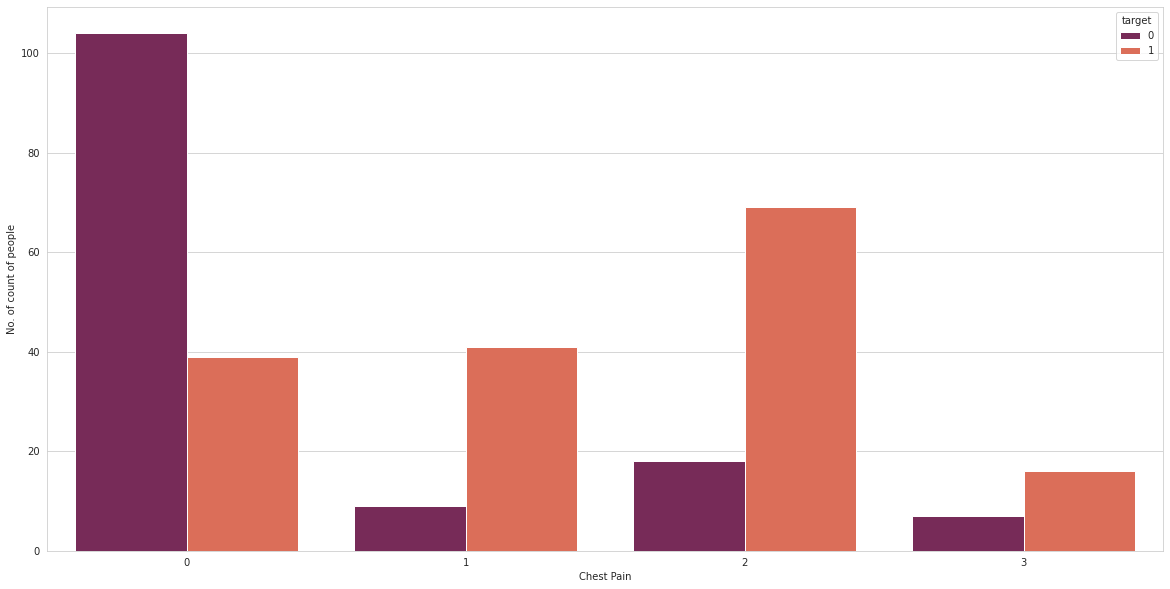

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'cp', data= heart_data,hue= 'target', palette='rocket')
plt.xlabel('Chest Pain')
plt.ylabel('No. of count of people')
plt.show()

### Show chest pain with respect to heart disease

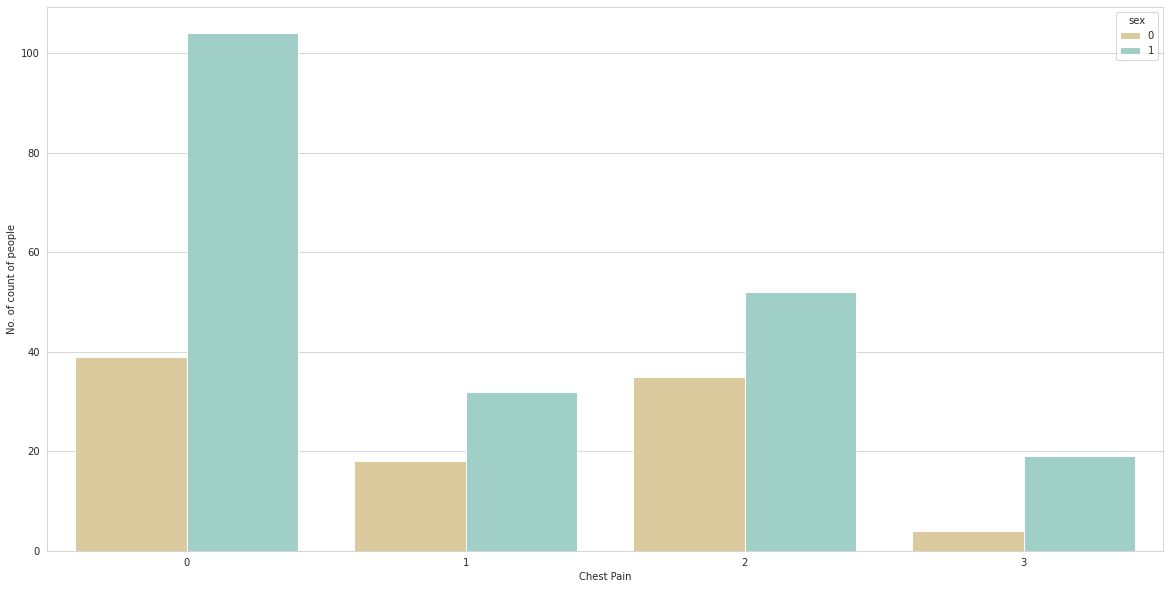

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'cp', data= heart_data,hue= 'sex', palette='BrBG')
plt.xlabel('Chest Pain')
plt.ylabel('No. of count of people')
plt.show()

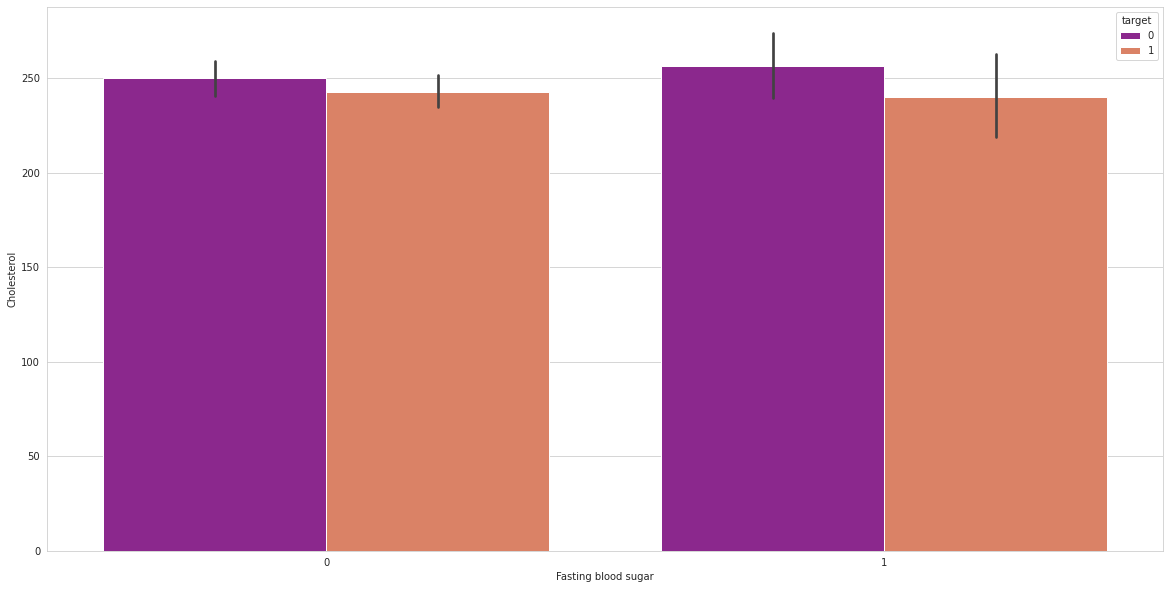

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'fbs',y = 'chol', data= heart_data, hue= 'target', palette='plasma')
plt.xlabel('Fasting blood sugar')
plt.ylabel('Cholesterol')
plt.show()

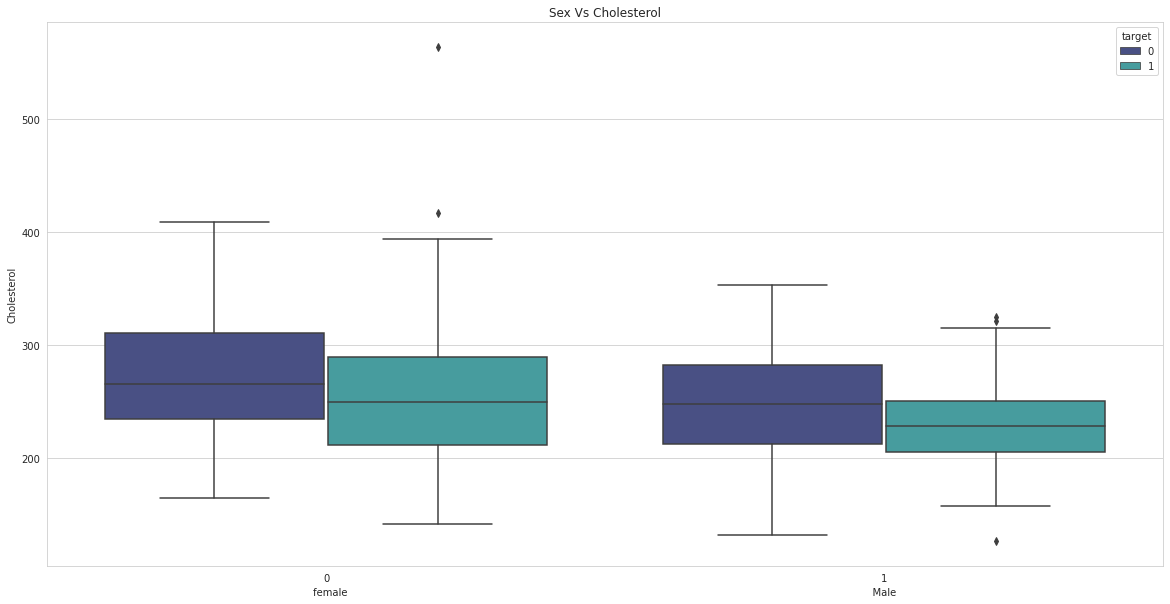

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'sex', y='chol', data= heart_data,hue= 'target', palette= 'mako')
plt.title('Sex Vs Cholesterol')
plt.xlabel('female                                                                                                                                                                        Male')
plt.ylabel('Cholesterol')
plt.show()

### Observe the outliers with help of boxplot, outliers are values that are very small or large in the dataset.

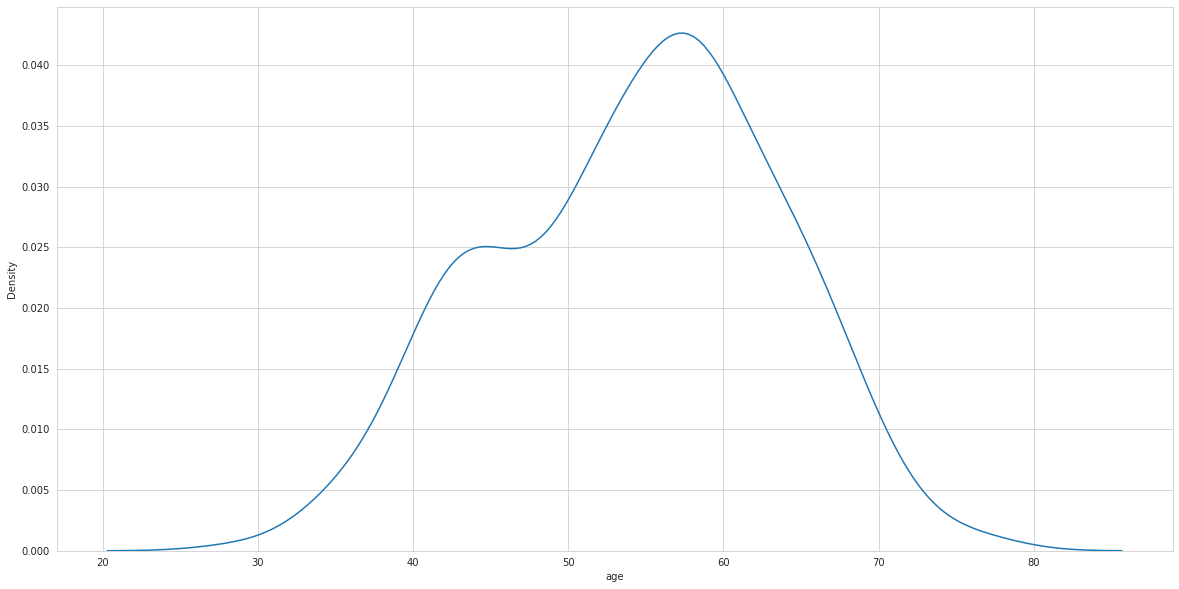

In [ ]:
plt.figure(figsize=(20, 10))
sns.kdeplot(heart_data.age)

From the results we obtained, we note that the disease begins to spread at high rates at the age of 33 years and then intensifies in prevalence between approximately 43 to 46 years, and then continues to spread to reach the largest number of infections between approximately 50 to 58 years, and then begins to decline Gradually

In [ ]:
heart_data_target = heart_data.groupby("target").size()
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


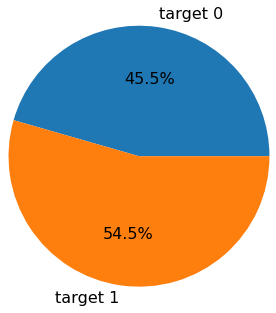

In [ ]:
plt.pie(heart_data_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

Over 50% people who was diagnosed heart disease.



In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart_data_sex = heart_data.groupby(["sex","target"]).size()
heart_data_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

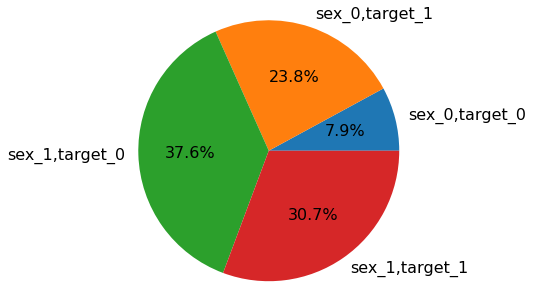

In [ ]:
plt.pie(heart_data_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The ratio of male has heart disease is 30.7%, a little bit higher than female.

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Building a Predictive System

In [ ]:
input_data = (35,0,0,138,183,0,1,182,0,1.4,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
